Exercise 1: Duplicate Detection and Removal

In [640]:
import pandas as pd
titanic_dataset = pd.read_csv("train.csv")
print(titanic_dataset.shape)

(891, 12)


In [641]:
titanic_data = titanic_dataset.copy() 

In [642]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [643]:
titanic_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [644]:
# To show rows which have duplicates among all columns
titanic_dataset[titanic_dataset.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [645]:
rows = len(titanic_dataset)
print(f" Number of rows: {rows}")

 Number of rows: 891


In [646]:
titanic_dataset.drop_duplicates(inplace = True)
rows_no_duplicates = len(titanic_dataset)
print(f" Number of rows: {rows_no_duplicates} after removing duplicates")

 Number of rows: 891 after removing duplicates


 Exercise 2: Handling Missing Values

In [647]:
pd.isna(titanic_dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [648]:
# To check the number of  missing values in each column
# Column "Age" has 177 missing values, "Cabin" - 687 missing values and "Embarked" - 2 missing values
pd.isna(titanic_dataset).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [649]:
# Missing values in the column "Cabin" will be replaces with "Deck"
titanic_dataset["Cabin"].fillna("Deck")

0      Deck
1       C85
2      Deck
3      C123
4      Deck
       ... 
886    Deck
887     B42
888    Deck
889    C148
890    Deck
Name: Cabin, Length: 891, dtype: object

In [650]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [651]:
import numpy as np
from sklearn.impute import SimpleImputer 


In [652]:
# Creating an imputer which will help us to generate a mean age among all non-missing values and  use it in order to replce all missing values in column "Age"
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [653]:
titanic_dataset["Age"] = imputer.fit_transform(titanic_dataset[["Age"]])
titanic_dataset["Age"] = titanic_dataset["Age"].round(1)


In [654]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [655]:
# Checking how many missing values are still in the dataset
pd.isna(titanic_dataset).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [656]:
# checking unique values in order to make sure we have correct information in all columns
titanic_dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Exercise 3: Feature Engineering

In [657]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [658]:
# Create FamilySize feature (SibSp + Parch + 1 for self)
titanic_dataset['Family Size'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1

In [659]:
def extract_title(full_name):
    return full_name.split(", ")[1].split(".")[0]
titanic_dataset["Title"] = titanic_dataset["Name"].apply(extract_title)
titanic_dataset["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [660]:
rare_titles = ["Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer"]
titanic_dataset["Title"] =titanic_dataset["Title"].replace({
    "Mlle":"Miss",
    "Ms":"Miss",
    "Mme":"Mrs",
    "Lady": "Mrs",
    "the Countess":"Mrs",
    **{title: "Rare" for  title in rare_titles}
})


In [661]:
titanic_dataset["Title"].value_counts()

Title
Mr        517
Miss      185
Mrs       128
Master     40
Rare       21
Name: count, dtype: int64

In [662]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [663]:

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# using one hot encoding we encoded nominal variables in columns :Sex,Embarked,Title
categorical_cols = ["Sex", "Embarked", "Title"]

cols_to_encode = [col for col in categorical_cols if col in titanic_dataset.columns]

print("Encoding:", cols_to_encode)

titanic_dataset = pd.get_dummies(titanic_dataset, columns=cols_to_encode)

Encoding: ['Sex', 'Embarked', 'Title']


In [665]:
titanic_dataset["Age_before"] = titanic_dataset["Age"]

In [666]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family Size', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_before'],
      dtype='object')

In [667]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_before
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,True,False,False,True,False,False,True,False,False,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,True,False,False,False,False,False,True,False,38.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,False,True,False,True,False,False,False,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,False,True,False,False,False,True,False,35.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,True,False,False,True,False,False,True,False,False,35.0


In [668]:
#Quantile capping for Age column (0.02, 0.98)
q_lo, q_hi = 0.02, 0.98
lower = titanic_dataset["Age"].quantile(q_lo)
upper = titanic_dataset["Age"].quantile(q_hi)

titanic_dataset["Age_after"] = titanic_dataset["Age"].clip(lower=lower, upper=upper)

/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_53568/3701987402.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([box1, box2], labels=["Before", "After"])  # two boxes next to each other


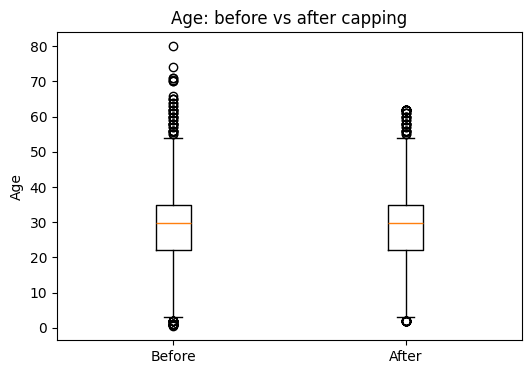

In [ ]:
# Creating two boxplots next to each other for comparison of age after treating outliers with quantile capping (0.98)
box1 = titanic_dataset["Age_before"]
box2 = titanic_dataset["Age_after"]

plt.figure(figsize=(6,4))
plt.boxplot([box1, box2], labels=["Before", "After"])  # two boxes next to each other
plt.title("Age: before vs after capping")
plt.ylabel("Age")
plt.show()

In [670]:
titanic_dataset["Fare_before"] = titanic_dataset["Fare"]

In [ ]:
#Quantile capping for Age column (0.02, 0.98)
q_lo, q_hi = 0.02, 0.98
lower = titanic_dataset["Fare"].quantile(q_lo)
upper = titanic_dataset["Fare"].quantile(q_hi)

titanic_dataset["Fare_after"] = titanic_dataset["Fare"].clip(lower=lower, upper=upper)

/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_53568/254133090.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([box1, box2], labels=["Before", "After"])  # two boxes next to each other


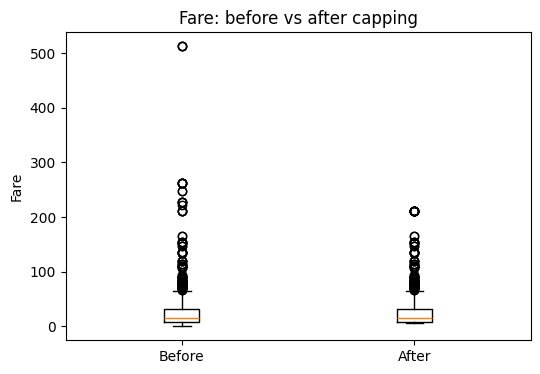

In [ ]:
# Creating two boxplots next to each other for comparison of age after treating outliers with quantile capping (0.98)
box1 = titanic_dataset["Fare_before"]
box2 = titanic_dataset["Fare_after"]

plt.figure(figsize=(6,4))
plt.boxplot([box1, box2], labels=["Before", "After"])  # two boxes next to each other
plt.title("Fare: before vs after capping")
plt.ylabel("Fare")
plt.show()

In [673]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:


scaler = MinMaxScaler()
titanic_dataset['Age_normalized'] = scaler.fit_transform(titanic_dataset[['Age_after']])

In [675]:
titanic_dataset["Age_normalized"]

0      0.333333
1      0.600000
2      0.400000
3      0.550000
4      0.550000
         ...   
886    0.416667
887    0.283333
888    0.461667
889    0.400000
890    0.500000
Name: Age_normalized, Length: 891, dtype: float64

In [ ]:
# Normalizing "Fare" data using MiniMaxScaler
scaler = MinMaxScaler()
titanic_dataset['Fare_normalized'] = scaler.fit_transform(titanic_dataset[['Fare_after']])

In [621]:
titanic_dataset["Fare_normalized"]

0      0.004160
1      0.316609
2      0.007453
3      0.227884
4      0.008063
         ...   
886    0.032217
887    0.115168
888    0.083207
889    0.115168
890    0.006599
Name: Fare_normalized, Length: 891, dtype: float64

In [681]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_normalized,Fare_normalized,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0.333333,0.004160,False,False,True,False,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0.600000,0.316609,False,False,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.400000,0.007453,False,False,True,False,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0.550000,0.227884,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0.550000,0.008063,False,False,True,False,False,False,True,False


In [ ]:
import pandas as pd
# Creating and encoding age groups
bins = [0, 12, 18, 60, 100] # different age groups
labels = ["Child", "Teen", "Adult", "Senior"] # label each age group
titanic_dataset["AgeGroup"] = pd.cut( # creating a new feature "AgeGroup" using "Age" column
    titanic_dataset["Age"],
    bins=bins,
    labels=labels,
    right=True,            
    include_lowest=True,   
    ordered=True
)
titanic_dataset = pd.get_dummies(  # using one-hot encoding, encoding values in "AgeGroup" column based on different age groups
    titanic_dataset,
    columns=["AgeGroup"],
    prefix="AgeGroup",
    drop_first=False    
)



